In [1]:
import pandas as pd
import numpy as np
import calendar
from matplotlib import pyplot as plt
from scipy import stats

In [26]:
daily_cumulative = pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/287fc645-4352-4477-9c8c-55bc054b7e76/download/daily_cuml_scot_20210201.csv')

length = daily_cumulative.Date.count()
print("It has been " + str(length) + " days since this whole thing got started.")

It has been 339 days since this whole thing got started.


The data frame contains four columns: the date, the number of cases reported on that day, the cumulative number of cases, and the number of deaths of people testing positive for COVID-19 within 28 days of their death. 

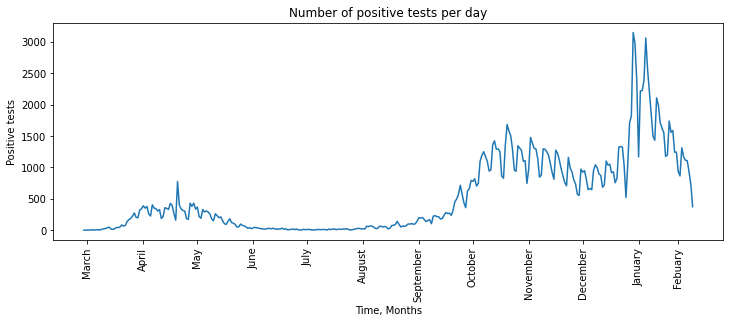

In [3]:
plt.figure(figsize=(12,4))
plt.plot(daily_cumulative["DailyCases"])
plt.xlabel("Time, Months")
months = calendar.month_name[3:13]+['January', 'Febuary']
plt.xticks([2, 33, 63, 94, 124, 155, 186, 216, 247, 277, 308, 330], months, rotation=90)
plt.ylabel("Positive tests")
plt.title("Number of positive tests per day")
plt.show()

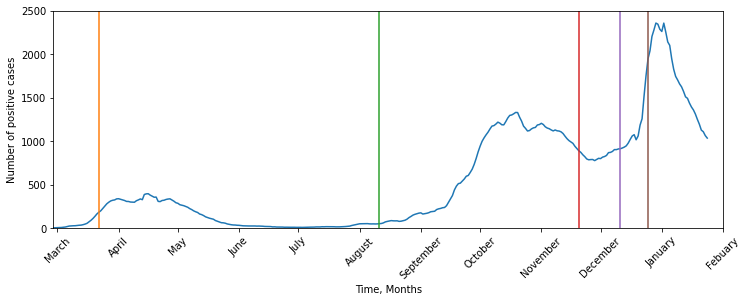

In [11]:
rolling_total = []
for i in range(length-7):
    rolling_total.append(daily_cumulative["DailyCases"][i:7+i].sum()/7)

plt.figure(figsize=(12,4))
plt.plot(range(length-7), rolling_total)
#plt.plot(range(23, 108), rolling_total[23:108])
#plt.plot(range(23, 23+10), rolling_total[23:23+10])
#plt.plot(range(301, 301+10), rolling_total[301:301+10])
#plt.plot(range(165+10, 301), rolling_total[165+10:301])

# verts
plt.plot([23, 23], [0, 2500]) # lock down 1 starts
plt.plot([165, 165], [0, 2500]) # schools go back
plt.plot([266, 266], [0, 2500]) # teir 3 --> teir 4 for gla
plt.plot([287, 287], [0, 2500]) # teir 4 --> teir 3 for gla
plt.plot([301, 301], [0, 2500]) # christmas

plt.xlabel("Time, Months")
months = calendar.month_name[3:13]+['January', 'Febuary']
plt.xticks([2, 33, 63, 94, 124, 155, 186, 216, 247, 277, 308, 339], months, rotation=45)
plt.ylim([0, 2500])
plt.xlim([0, 339])
plt.ylabel("Number of positive cases")
plt.show()

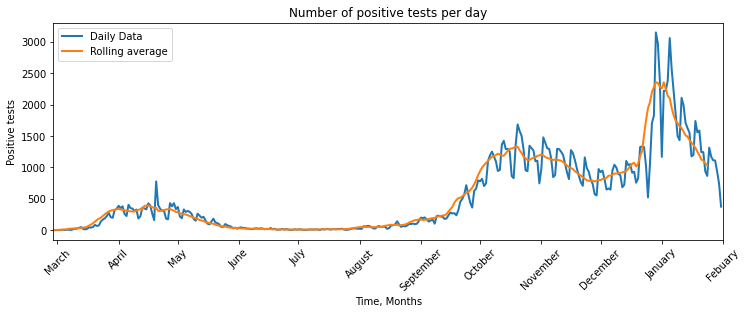

In [30]:
fig = plt.figure(figsize=(12,4))
plt.plot(daily_cumulative["DailyCases"], linewidth=2)
plt.plot(range(length-7), rolling_total, linewidth=2)
plt.xlabel("Time, Months")
months = calendar.month_name[3:13]+['January', 'Febuary']
plt.xticks([2, 33, 63, 94, 124, 155, 186, 216, 247, 277, 308, 339], months, rotation=45)
plt.ylabel("Positive tests")
plt.legend(["Daily Data", "Rolling average"])
plt.title("Number of positive tests per day")
plt.xlim([0, 339])
fig.savefig("RollingAverage.png", dpi=300)
plt.show()


R-squared: 0.703, gradient: 0.006131, y-intercept: 0.273298


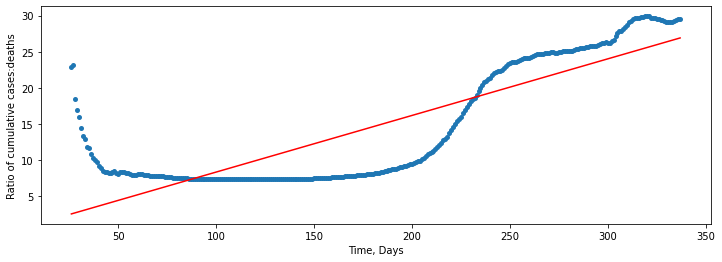

In [21]:
y = daily_cumulative["CumulativeCases"][13+14:]/daily_cumulative["Deaths"][13+14:]
res = stats.linregress(range(12+14, length-1), y)

plt.figure(figsize=(12,4))
print(f"R-squared: {res.rvalue**2:.3f},", \
      f"gradient: {res.slope**2:.6f},",\
      f"y-intercept: {res.intercept**2:.6f}")
plt.plot(x, res.intercept + res.slope*x, 'r', label='fit')


plt.scatter(range(12+14, length-1), y, linewidth=2, marker = '.', label = "data")
#plt.plot(range(length), rolling_total, linewidth=2)
plt.xlabel("Time, Days")
plt.ylabel("Ratio of cumulative cases:deaths")
#plt.title("Number of positive tests per day")
plt.show()

In [ ]:
#plt.plot(range(90, 190), rolling_total[90:190])
#plt.plot(range(165, 190), rolling_total[165:190])
#plt.plot(range(165+10, 190), rolling_total[165+10:190])
#plt.xticks([94, 124, 155, 186], calendar.month_name[6:10], rotation=90)
#plt.show()

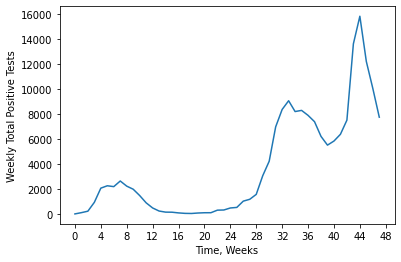

In [24]:
new_cases_each_week = []

for i in range(48):
    new_cases_each_week.append(sum(daily_cumulative["DailyCases"][0+i*7:7+i*7]))

months = calendar.month_name[3:13]+['January', 'Febuary']


plt.plot(new_cases_each_week)
plt.xlabel("Time, Weeks")
plt.ylabel("Weekly Total Positive Tests")
plt.xticks(range(0, 49, 4))
plt.show()



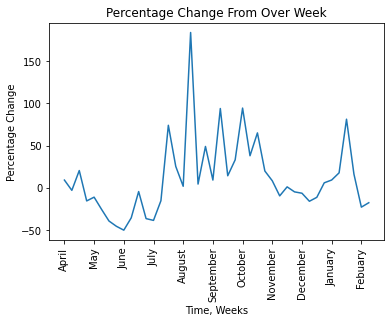

In [25]:
raw_change_over_prev_week = []
pct_change_over_prev_week = []
for i in range(4, 46):
    pct_change_over_prev_week.append((new_cases_each_week[i+1]-new_cases_each_week[i])*100/(new_cases_each_week[i]))
    raw_change_over_prev_week.append((new_cases_each_week[i+1]-new_cases_each_week[i]))

plt.plot(range(4, 46), pct_change_over_prev_week)
#plt.plot(pct_change_over_prev_week)
plt.xlabel("Time, Weeks")
months = calendar.month_name[4:13]+['January', 'Febuary']
plt.xticks(range(4, 46, 4), months, rotation = 90)
plt.ylabel("Percentage Change")
plt.title("Percentage Change From Over Week")
plt.show()